## Алгоритм k-ближайших соседей

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Устанавливаем seed для воспроизводимости результатов
np.random.seed(53)

# Задаем параметры генерации данных
N = 100
n_points = N // 3
x_max = 10
y_max = 10

# Генерируем точки для трех классов
red_points = np.random.rand(n_points, 2)*5
blue_points = np.random.rand(n_points, 2)*5 + np.array([3, 3])
green_points = np.random.rand(n_points, 2)*4 + np.array([6, 6])

# Массив признаков (координаты точек)
X_train_full = np.concatenate((red_points, blue_points, green_points))
# Массив меток классов (0 - красный, 1 - синий, 2 - зеленый)
y_train_full = np.concatenate((np.zeros(n_points), np.ones(n_points), 2 * np.ones(n_points)))

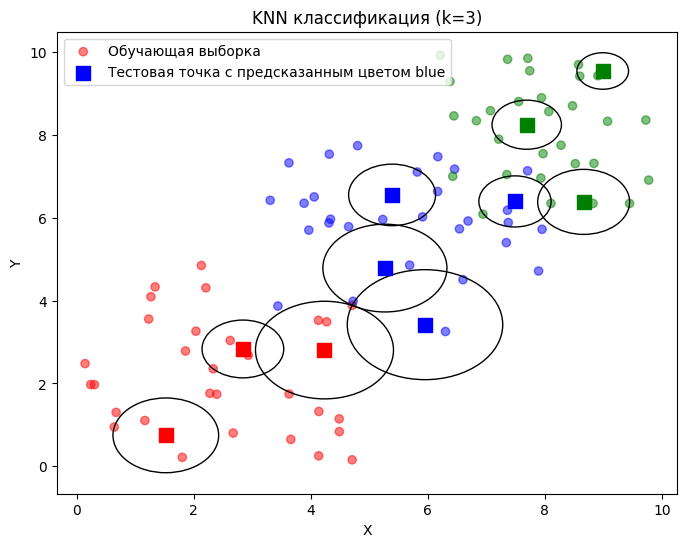

In [7]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42) #test_size=0.1 - 10% данных для теста

# Задаем количество ближайших соседей
k = 3

# Обучаем модель KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Делаем предсказания для тестовой выборки
y_pred = knn.predict(X_test)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=['red' if i == 0 else 'blue' if i == 1 else 'green' for i in y_train], label='Обучающая выборка', alpha=0.5) #alpha - прозрачность

for i, point in enumerate(X_test):
    # Находим k ближайших соседей
    distances, neighbors = knn.kneighbors([point], n_neighbors=k, return_distance=True)
    # Получаем цвета ближайших соседей
    neighbor_colors = [y_train[neighbor] for neighbor in neighbors[0]]
    # Определяем доминирующий цвет
    dominant_color = np.bincount(neighbor_colors).argmax()
    # Преобразуем индекс класса в цвет
    color = 'red' if dominant_color == 0 else 'blue' if dominant_color == 1 else 'green'
    plt.scatter(point[0], point[1], c=color, marker='s', s=100, label=f'Тестовая точка с предсказанным цветом {color}' if i == 0 else None)

    # Находим максимальное расстояние до ближайшего соседа
    max_distance = np.max(distances)
    # Создаем окружность
    circle = plt.Circle(point, radius=max_distance, color='black', fill=False)
    plt.gca().add_patch(circle)

plt.title(f'KNN классификация (k={k})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [8]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n", conf_matrix)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Матрица ошибок:
 [[3 0 0]
 [0 4 0]
 [0 0 3]]
Точность: 1.0
